# Mô tả tập dữ liệu:
Tập dữ liệu lấy từ Kaggle, tập dữ liệu bao gồm các thông tin vay tín dụng của người dùng trong 2 năm (2010, 2011).

| **Tên Cột**                              | **Mô tả**                                                                                              | **Kiểu Dữ Liệu** |
|------------------------------------------|------------------------------------------------------------------------------------------------------|------------------|
| **SeriousDlqin2yrs**                     | Người vay đã trải qua tình trạng chậm thanh toán từ 90 ngày trở lên hoặc tệ hơn.                     | Có/Không         |
| **RevolvingUtilizationOfUnsecuredLines** | Tổng dư nợ trên thẻ tín dụng và các khoản tín dụng cá nhân (trừ bất động sản và nợ trả góp) chia cho hạn mức tín dụng. | Phần trăm        |
| **age**                                  | Tuổi của người vay (theo năm).                                                                       | Số nguyên        |
| **NumberOfTime30-59DaysPastDueNotWorse** | Số lần người vay chậm thanh toán 30-59 ngày nhưng không tệ hơn trong 2 năm qua.                      | Số nguyên        |
| **DebtRatio**                            | Tỷ lệ nợ hàng tháng (bao gồm chi phí sinh hoạt, trợ cấp...) chia cho tổng thu nhập hàng tháng.       | Phần trăm        |
| **MonthlyIncome**                        | Thu nhập hàng tháng.                                                                                 | Số thực          |
| **NumberOfOpenCreditLinesAndLoans**      | Số khoản vay mở (trả góp như vay mua xe hoặc vay thế chấp) và các hạn mức tín dụng (ví dụ: thẻ tín dụng). | Số nguyên        |
| **NumberOfTimes90DaysLate**              | Số lần người vay chậm thanh toán 90 ngày hoặc lâu hơn.                                                | Số nguyên        |
| **NumberRealEstateLoansOrLines**         | Số khoản vay bất động sản và thế chấp, bao gồm các hạn mức tín dụng liên quan đến nhà ở.              | Số nguyên        |
| **NumberOfTime60-89DaysPastDueNotWorse** | Số lần người vay chậm thanh toán 60-89 ngày nhưng không tệ hơn trong 2 năm qua.                      | Số nguyên        |
| **NumberOfDependents**                   | Số lượng người phụ thuộc trong gia đình (không bao gồm người vay, ví dụ: vợ/chồng, con cái...).       | Số nguyên        |

# Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Đọc dữ liệu

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# Lấy các Columns để phân tích và tính toán

In [3]:
# Giữ các cột có tên trong danh sách
df = df.filter(items=[
    "RevolvingUtilizationOfUnsecuredLines",
    "DebtRatio",
    "NumberOfTimes90DaysLate",
    "age",
    "SeriousDlqin2yrs",
    "MonthlyIncome",
    "NumberOfDependents"])


# EDA

## Kiểm tra tỷ lệ vỡ nợ

Proportion of People Who Defaulted: 0.06684


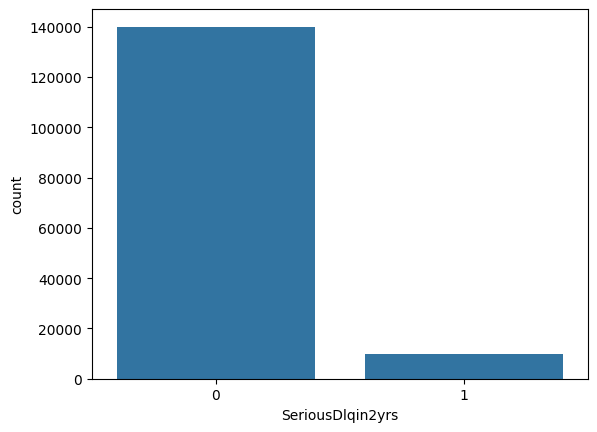

In [4]:
sns.countplot(x="SeriousDlqin2yrs", data=df)
print("Proportion of People Who Defaulted: {}".format(df["SeriousDlqin2yrs"].sum() / len(df)))

## Kiểm tra và tính tỉ lệ số lượng giá trị thiếu

In [5]:
# Kiểm tra số lượng giá trị thiếu
missing_summary = df.isnull().sum()
pd.DataFrame({"Column": missing_summary.index, "Number of Null Values": missing_summary.values,
             "Proportion": missing_summary.values / len(df) })

,Column,Number of Null Values,Proportion
0,RevolvingUtilizationOfUnsecuredLines,0,0.000000
1,DebtRatio,0,0.000000
2,NumberOfTimes90DaysLate,0,0.000000
3,age,0,0.000000
4,SeriousDlqin2yrs,0,0.000000
5,MonthlyIncome,29731,0.198207
6,NumberOfDependents,3924,0.026160


## DebtRatio

In [6]:
df["DebtRatio"].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

Sau khi xem xét các giá trị, ta thấy có trường hợp một người nợ gấp gần 330.000 lần so với tài sản họ sở hữu. Điều này là không thực tế, có thể đây là 1 outlier. Bây giờ ta sẽ cần phải đi tìm các giá trị ngoại lai.

In [7]:
df["DebtRatio"].quantile(0.975)

3489.024999999994

2,5% của tập dữ liệu nợ nhiều hơn 3.500 lần so với tài sản họ sở hữu. Chúng ta cần kiểm tra thêm để xác định liệu đây có phải là các giá trị ngoại lai hay không.

In [8]:
df[df['DebtRatio'] > 3489.025][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,3750.000000,185.000000
mean,0.064267,0.064865
std,0.245260,0.246956
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


Vấn đề thứ nhất là trong số 3750 bản ghi có DebtRatio > 3500, chỉ có 185 bản ghi có giá trị cho thu nhập hàng tháng. Bên cạnh đó, những người có thu nhập hàng tháng dường như chỉ có thu nhập hàng tháng là 1 hoặc 0. Ta sẽ cần kiểm tra các bản ghi có tỷ lệ vỡ nợ trong 2 năm bằng với thu nhập hàng tháng:

In [9]:
df[(df['DebtRatio'] > 3489.025) & (df['SeriousDlqin2yrs'] == df['MonthlyIncome'])].shape[0]

164

Trong tổng số 185 bản ghi, 164 bản ghi có cùng giá trị cho tỷ lệ vỡ nợ trong 2 năm và thu nhập hàng tháng, điều này cho thấy có lỗi nhập liệu.

Vấn đề thứ hai là mặc dù nợ gấp hàng ngàn lần so với tài sản họ sở hữu mà những người này không vỡ nợ nhiều hơn so với người bình thường. Kết luận là những bản ghi này là lỗi nhập liệu, vì vậy sẽ xóa khỏi tập dữ liệu.

## NumberOfTimes90DaysLate

In [10]:
df["NumberOfTimes90DaysLate"].value_counts().sort_index()

NumberOfTimes90DaysLate
0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: count, dtype: int64

Không có ai trễ hạn từ 17 đến 96 lần, nhưng lại có hàng trăm người trễ hạn 98 lần. Ta sẽ kiểm tra các bản ghi này:

In [11]:
df[df['NumberOfTimes90DaysLate'] > 17][['SeriousDlqin2yrs', 'NumberOfTimes90DaysLate']].describe()

,SeriousDlqin2yrs,NumberOfTimes90DaysLate
count,269.000000,269.000000
mean,0.546468,97.962825
std,0.498764,0.270628
min,0.000000,96.000000
25%,0.000000,98.000000
50%,1.000000,98.000000
75%,1.000000,98.000000
max,1.000000,98.000000


Khá vô lý khi có 269 người trễ hạn thanh toán trong 90 ngày (hoặc lâu hơn) đến 96 hoặc 98 lần trong khoảng thời gian 2 năm. Nên xem đây là outliers.

## RevolvingUtilizationOfUnsecuredLines

Tỷ lệ này biểu thị số tiền nợ so với hạn mức tín dụng, vì vậy các giá trị không nên vượt quá 1 quá nhiều. Đầu tiên, chúng ta sẽ xem xét các giá trị gần 1 và đánh giá tỷ lệ vỡ nợ của các giá trị đó. Bắt đầu với khoảng từ 0,9 đến 4,0

In [12]:
df[(df['RevolvingUtilizationOfUnsecuredLines'] > .9) & (df['RevolvingUtilizationOfUnsecuredLines'] <= 4)].SeriousDlqin2yrs.describe()

count    19805.000000
mean         0.225347
std          0.417821
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SeriousDlqin2yrs, dtype: float64

19805 người này có tỷ lệ vỡ nợ gần 1/4. Điều này vẫn khả thi trên thực tế. Nhưng vẫn cần xem xét những người có tỷ lệ sử dụng tín dụng quay vòng (RUUL) cao hơn. Ta sẽ kiểm tra khoảng từ 4 đến 10:

In [13]:
df[(df['RevolvingUtilizationOfUnsecuredLines'] > 4) & (df['RevolvingUtilizationOfUnsecuredLines'] <= 10)].SeriousDlqin2yrs.describe()

count    23.000000
mean      0.260870
std       0.448978
min       0.000000
25%       0.000000
50%       0.000000
75%       0.500000
max       1.000000
Name: SeriousDlqin2yrs, dtype: float64

Chỉ có 23 bản ghi trong khoảng từ 4 -> 10, nhưng họ vẫn có tỷ lệ vỡ nợ cao. Vậy tiếp tục xem xét những người có RUUL > 10:

In [14]:
df[df['RevolvingUtilizationOfUnsecuredLines'] > 10].describe()

,RevolvingUtilizationOfUnsecuredLines,DebtRatio,NumberOfTimes90DaysLate,age,SeriousDlqin2yrs,MonthlyIncome,NumberOfDependents
count,241.000000,241.000000,241.000000,241.000000,241.000000,173.00000,228.000000
mean,3564.023932,571.918644,0.074689,50.630705,0.070539,8467.67052,0.688596
std,5123.802683,1772.948412,0.579711,14.565389,0.256587,6564.06825,1.038659
min,11.385230,0.000800,0.000000,24.000000,0.000000,0.00000,0.000000
25%,941.000000,0.217813,0.000000,39.000000,0.000000,4500.00000,0.000000
50%,2012.000000,0.402560,0.000000,48.000000,0.000000,7000.00000,0.000000
75%,4116.000000,59.000000,0.000000,62.000000,0.000000,10091.00000,1.000000
max,50708.000000,21395.000000,8.000000,87.000000,1.000000,44472.00000,4.000000


241 người này không có tỷ lệ vỡ nợ cao hơn so với những người khác khác, mặc dù một số người trong số họ nợ gấp hàng trăm nghìn lần hạn mức tín dụng của mình. Những trường hợp này không nhất quán với phần còn lại của dữ liệu, vì vậy sẽ loại bỏ khỏi tập dữ liệu.

## age

In [15]:
df["age"].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

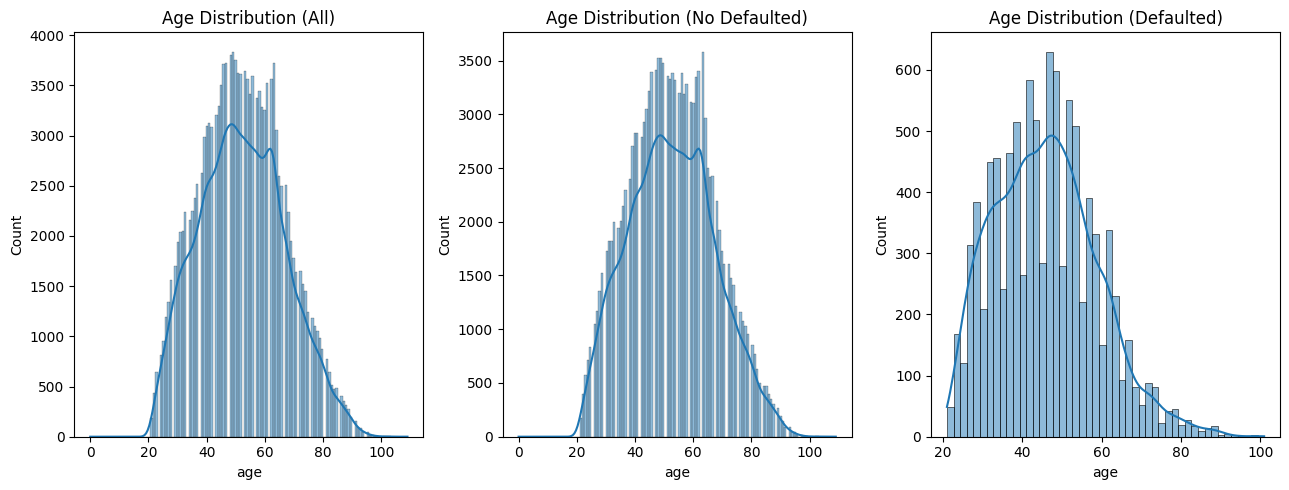

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))  # 1 hàng, 3 cột

# Đồ thị phân phối tuổi của toàn bộ dữ liệu
sns.histplot(df["age"], kde=True, ax=axes[0])
axes[0].set_title("Age Distribution (All)")

# Đồ thị phân phối tuổi của những người không vỡ nợ
sns.histplot(df.loc[df["SeriousDlqin2yrs"] == 0]["age"], kde=True, ax=axes[1])
axes[1].set_title("Age Distribution (No Defaulted)")

# Đồ thị phân phối tuổi của những người vỡ nợ
sns.histplot(df.loc[df["SeriousDlqin2yrs"] == 1]["age"], kde=True, ax=axes[2])
axes[2].set_title("Age Distribution (Defaulted)")

plt.tight_layout()
plt.show()


Có vẻ như có nhiều người trẻ tuổi vỡ nợ hơn và phân phối nhìn chung là ổn

## MonthlyIncome

In [17]:
df["MonthlyIncome"].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

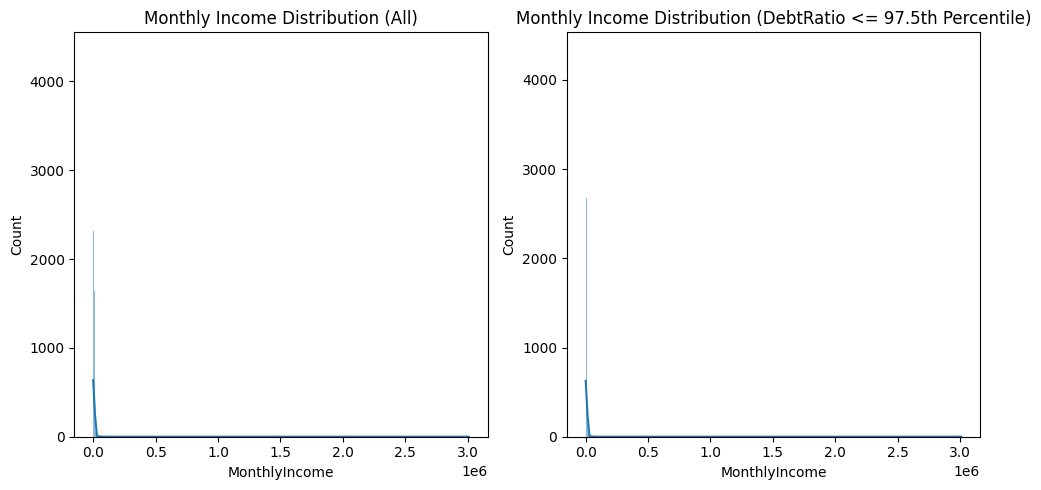

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Đồ thị phân phối MonthlyIncome (tất cả dữ liệu)
sns.histplot(df["MonthlyIncome"].dropna(), kde=True, ax=axes[0])
axes[0].set_title("Monthly Income Distribution (All)")

# Đồ thị phân phối MonthlyIncome cho nhóm có DebtRatio dưới phân vị 97.5
sns.histplot(df.loc[df["DebtRatio"] <= df["DebtRatio"].quantile(0.975)]["MonthlyIncome"].dropna(), kde=True, ax=axes[1])
axes[1].set_title("Monthly Income Distribution (DebtRatio <= 97.5th Percentile)")

plt.tight_layout()
plt.show()

Phân phối giá trị bị lệch, chúng ta sẽ cần xử lý missing values bằng thuật toán EM

## NumberOfDependents

Thống kê về cột NumberOfDependents

In [20]:
df["NumberOfDependents"].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

Đếm số lượng phần tử trong cột NumberOfDependents

In [21]:
df["NumberOfDependents"].value_counts()

NumberOfDependents
0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: count, dtype: int64

Thống kê các giá trị <= 10 trong cột NumberOfDependents

In [22]:
df.loc[df["NumberOfDependents"] <= 10]["SeriousDlqin2yrs"].describe()

count    146074.000000
mean          0.067411
std           0.250733
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64

Vẽ biểu đồ cột về phân bố của NumberOfDependents. Trục x thể hiện các giá trị khác nhau, trục y thể hiện số lượng hoặc tần suất của những giá trị đó.

<Axes: xlabel='NumberOfDependents', ylabel='count'>

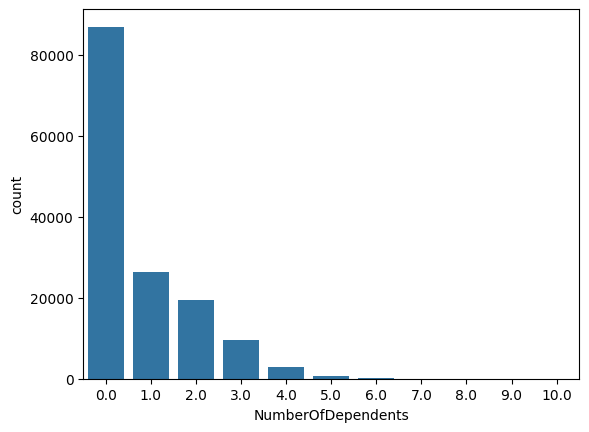

In [23]:
sns.countplot(x="NumberOfDependents", data=df.loc[df["NumberOfDependents"] <= 10])

Biểu đồ cho thấy phần lớn các phần tử có giá trị là 0.0, với khoảng 146.000 phần tử. Số lượng phần tử giảm khi giá trị NumberOfDependents tăng lên, với rất ít phần tử có giá trị lớn hơn 6.  Ta sẽ cần xử lý missing values bằng EM.

# Đề xuất cho tiền xử lý

1.   Giữ lại 7 cột dữ liệu:     "RevolvingUtilizationOfUnsecuredLines", "DebtRatio" "NumberOfTimes90DaysLate", "age", "SeriousDlqin2yrs", "MonthlyIncome",  "NumberOfDependents"
2. Loại bỏ các mẫu có giá trị DebtRatio lớn hơn phân vị 97.5
3.   Giữ lại các instances thỏa:
*   0<= RevolvingUtilizationOfUnsecuredLines <=10
*   NumberOfTimes90DaysLate <= 17
4. Xử lý missing values cho cột MonthlyIncome và NumberOfDependents bằng thuật toán EM.

